In [9]:
from datetime import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import db

%matplotlib inline

In [26]:
table_name = 'm1m3_HardpointActuatorData'
expected_rate = 50  # Hz

In [27]:
def make_delta_time(df_col, dtype=None):
    ts = df_col.values
    dt = ts[1:] - ts[:-1]
    if dtype is None:
        return ts, dt
    else:
        return ts.astype(dtype), dt.astype(dtype)

In [35]:
#engine = db.get_engine1()
engine = db.get_engine2()

In [36]:
#b1 = datetime(2019, 1, 20, 10, 55, 0)
#b2 = datetime(2019, 1, 20, 11, 5, 0)
b1 = datetime(2019, 2, 13, 17, 55, 0)
b2 = datetime(2019, 2, 13, 18, 5, 0)
dt = b2 - b1
expected_num_messages = dt.seconds * expected_rate

In [47]:
query = 'select date_time,private_sndStamp,private_rcvStamp from {0} where {0}.private_sndStamp between \'{1}\' and \'{2}\';'.format(table_name, b1.timestamp(), b2.timestamp())
print(query)

select date_time,private_sndStamp,private_rcvStamp from m1m3_HardpointActuatorData where m1m3_HardpointActuatorData.private_sndStamp between '1550105700.0' and '1550106300.0';


In [38]:
df1 = pd.read_sql_query(query, engine)

In [39]:
delta_messages = expected_num_messages - df1.shape[0]
print('Expected {} messages, got {} messages, missing {} messages'.format(expected_num_messages, df1.shape[0], delta_messages))

Expected 30000 messages, got 26422 messages, missing 3578 messages


In [40]:
insert_times = df1['date_time'].values
send_times = df1['private_sndStamp'].values
recv_times = df1['private_rcvStamp'].values
for i in range(10):
    print("{:.10f}\t{:.10f}\t{:.10f}".format(float(insert_times[i])/1e9, send_times[i], recv_times[i]))

print(send_times[:5] - insert_times[:5].astype('float')/1e9)

1550080559.1105229855	1550080639.8959629536	1550080559.1104578972
1550080559.1400210857	1550080639.9158871174	1550080559.1399800777
1550080559.1635241508	1550080639.9359049797	1550080559.1634728909
1550080559.1828889847	1550080639.9559750557	1550080559.1828451157
1550080559.2057521343	1550080639.9759159088	1550080559.2057049274
1550080559.2268128395	1550080639.9958419800	1550080559.2267680168
1550080559.2492790222	1550080640.0158529282	1550080559.2492320538
1550080559.2724962234	1550080640.0560851097	1550080559.2724499702
1550080559.2940909863	1550080640.0758969784	1550080559.2940499783
1550080559.3103489876	1550080640.0958540440	1550080559.3103070259
[80.78543997 80.77586603 80.77238083 80.77308607 80.77016377]


In [41]:
insert_time, dt_insert_ns = make_delta_time(df1['date_time'], dtype=np.int64)
dt_insert = dt_insert_ns / 1e9
send_time, dt_send = make_delta_time(df1['private_sndStamp'])
recv_time, dt_recv = make_delta_time(df1['private_rcvStamp'])

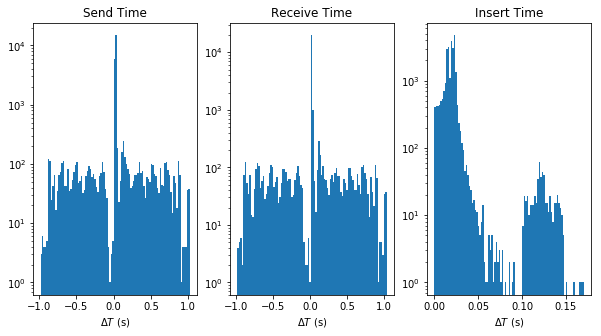

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(dt_send, bins=100)
ax[0].set_title('Send Time')
ax[0].set_xlabel('$\Delta T$ (s)')
ax[0].set_yscale('log')
ax[1].hist(dt_recv, bins=100)
ax[1].set_title('Receive Time')
ax[1].set_xlabel('$\Delta T$ (s)')
ax[1].set_yscale('log')
ax[2].hist(dt_insert, bins=100)
ax[2].set_title('Insert Time')
ax[2].set_xlabel('$\Delta T$ (s)')
ax[2].set_yscale('log')
fig.subplots_adjust(wspace=0.2)

Text(0,0.5,'$\\Delta$ Receive Time')

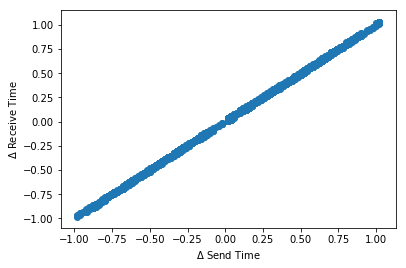

In [43]:
plt.scatter(dt_send, dt_recv)
plt.xlabel("$\Delta$ Send Time")
plt.ylabel('$\Delta$ Receive Time')

In [44]:
neg_time = dt_send < 0
orig_time = (send_time[:-1][neg_time]).astype('datetime64[s]')

In [45]:
orig_time

array(['2019-02-13T17:57:20', '2019-02-13T17:57:20',
       '2019-02-13T17:57:21', ..., '2019-02-13T18:06:20',
       '2019-02-13T18:06:20', '2019-02-13T18:06:20'],
      dtype='datetime64[s]')

In [ ]:
long_time = dt_send > 0.03

In [ ]:
orig_ts = (send_time[:-1][long_time]).astype('datetime64[s]')

In [ ]:
orig_ts

In [ ]:
print(send_time.dtype)
indexes = np.where(dt_send > 0.03)
#print(indexes[0])
print((send_time[:-1][indexes] * 1e9).astype('datetime64[ns]'))
next_indexes = indexes[0] + 1
print((send_time[:-1][next_indexes] * 1e9).astype('datetime64[ns]'))
print(dt_send[indexes])

In [ ]:
insert_time = df1['date_time'].values

In [ ]:
insert_long = insert_time[:-1][long_time]

In [ ]:
insert_long

In [ ]:
datetime.utcfromtimestamp(1547155885.310383)

In [ ]:
(770366976-730547968)/1e9